In [208]:
import csv
data = [] 
cf = open("/Users/apple/Documents/Wisc/study/2019Fall/STAT 628/Module3/PAreview_clean.csv",'r', encoding='utf-8',errors='ignore')

file = csv.DictReader(cf)

for x in file:
    line = {'business_id':x['business_id'],'date':x['date'],'stars':x['stars'],'text':x['text']}
    data.append(line)

cf.close()

In [209]:
len(data)

214443

In [210]:
import stemming

from stemming.porter2 import stem 

In [211]:
data[1]

{'business_id': 'FxLfqxdYPA6Z85PFKaqLrg',
 'date': '2016-05-07 01:36:53',
 'stars': '4.0',
 'text': "['wow', 'surpris', 'one', 'two', 'star', 'review', 'start', 'tender', 'calamari', 'although', 'marinara', 'sauc', 'bit', 'bland', 'touch', 'salt', 'made', 'right', 'husband', 'veal', 'pepper', 'said', 'delici', 'tender', 'mash', 'potato', 'perfect', 'salmon', 'diablo', 'also', 'delici', 'salad', 'beauti', 'dress', 'serv', 'salad', 'nice', 'amount', 'end', 'delici', 'meal', 'piec', 'tiramisu', 'server', 'matt', 'right', 'pleasant', 'knowledg', 'menu', 'appet', 'salad', 'entre', 'ti', 'ame', 'perfect', 'love', 'salad', 'NOTmind', 'NOTentre', 'NOTserv', 'NOTstill', 'NOTeat', 'no', 'problem', 'let', 'dinner', 'cool', 'right', 'temp', 'eat', 'comfort', 'wonder', 'someti', 'ame', 'peopl', 'NOTappreci', 'NOTrelax', 'NOTtake', 'NOTti', 'NOTame', 'NOTeat', 'NOTwonder', 'NOTbeauti', 'NOTprepar', 'NOTmeal', 'wonder', 'atmospher', 'relax', 'chair', 'super', 'comfort', 'certain', 'back', 'give', 'tr

In [213]:
k=dict()
for i in range(len(data)):
    if data[i]['stars'] not in k.keys():
        k[data[i]['stars']] =1
    else:
        k[data[i]['stars']] +=1
k

{'4.0': 60189, '5.0': 81376, '1.0': 22640, '3.0': 30048, '2.0': 20190}

In [225]:
star_num={'1.0':k['1.0'],'2.0':k['2.0'],'3.0':k['3.0'],'4.0':k['4.0'],'5.0':k['5.0']}
star_num

{'1.0': 22640, '2.0': 20190, '3.0': 30048, '4.0': 60189, '5.0': 81376}

In [226]:
star_num['1.0']

22640

# Find the word's distribution over diff stars

# service dist

In [230]:
stem('service')

'servic'

In [231]:
'servic' in data[0]['text']

True

In [232]:
service=dict()
for i in range(len(data)):
    if data[i]['stars'] not in service.keys():
        service[data[i]['stars']]=0
        if ('servic' in data[i]['text']) or ('service' in data[i]['text']):
            service[data[i]['stars']]+=1
    else:
        if ('servic' in data[i]['text']) or ('service' in data[i]['text']):
            service[data[i]['stars']]+=1
           
    

In [233]:
service

{'4.0': 16766, '5.0': 20687, '1.0': 7288, '3.0': 9720, '2.0': 6832}

In [234]:
import matplotlib.pyplot as plt
import numpy as np

In [235]:
l=sorted(list(service.keys()))
l

['1.0', '2.0', '3.0', '4.0', '5.0']

In [236]:
value=[]
for i in l:
    value.append(service[i]/star_num[i])
value

[0.32190812720848055,
 0.33838533927686976,
 0.323482428115016,
 0.2785558823040755,
 0.2542150019661817]

<BarContainer object of 5 artists>

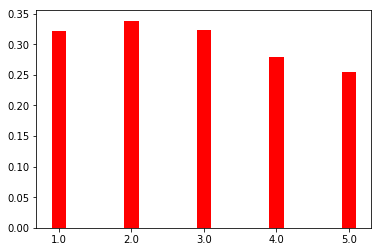

In [237]:
plt.bar(l,value, color='r', width=0.2)

# put all words(positive) we care in a dict

In [271]:
words=['perfect','delicious', 'love', 'great', 'good',  'friend','order','like','place']

In [272]:
words_stem=[]
for word in words:
    words_stem.append(stem(word))
words_stem

['perfect',
 'delici',
 'love',
 'great',
 'good',
 'friend',
 'order',
 'like',
 'place']

In [273]:
all_words=dict()
for word in words_stem:
    all_words[word]=dict()
    for i in range(len(data)):
        if data[i]['stars'] not in all_words[word].keys():
            all_words[word][data[i]['stars']]=0
        if (word in data[i]['text']) :
            all_words[word][data[i]['stars']]+=1
    else:
        if (word in data[i]['text']):
            all_words[word][data[i]['stars']]+=1
           
    

In [274]:
all_words

{'perfect': {'4.0': 7216, '5.0': 11683, '1.0': 250, '3.0': 1770, '2.0': 505},
 'delici': {'4.0': 13195, '5.0': 20641, '1.0': 423, '3.0': 3282, '2.0': 1059},
 'love': {'4.0': 13141, '5.0': 21181, '1.0': 1444, '3.0': 4358, '2.0': 2205},
 'great': {'4.0': 23880, '5.0': 33341, '1.0': 2321, '3.0': 8442, '2.0': 4175},
 'good': {'4.0': 31570, '5.0': 27488, '1.0': 5658, '3.0': 17005, '2.0': 8752},
 'friend': {'4.0': 16843, '5.0': 22100, '1.0': 3400, '3.0': 7400, '2.0': 4055},
 'order': {'4.0': 17682, '5.0': 17198, '1.0': 9785, '3.0': 10983, '2.0': 8508},
 'like': {'4.0': 19113, '5.0': 17406, '1.0': 6846, '3.0': 11551, '2.0': 7637},
 'place': {'4.0': 25594, '5.0': 33353, '1.0': 9078, '3.0': 13192, '2.0': 8613}}

In [275]:
n=len(all_words)
n

9

In [276]:
list(all_words.keys())

['perfect',
 'delici',
 'love',
 'great',
 'good',
 'friend',
 'order',
 'like',
 'place']

In [277]:
name=list(all_words.keys())
name[1]


'delici'

In [278]:
for i in range(n):
    print(331+i)

331
332
333
334
335
336
337
338
339


Text(0.5,1,'perfect')

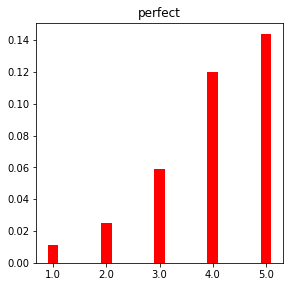

In [279]:
plt.figure(figsize=(15,15))
plt.subplot(331)
name=list(all_words.keys())
l=sorted(list(all_words[name[0]].keys()))
value=[]
for i in l:
    value.append(all_words[name[0]][i]/star_num[i])
plt.bar(l,value, color='r', width=0.2) 
plt.title(name[0])


Text(0.5,1,'place')

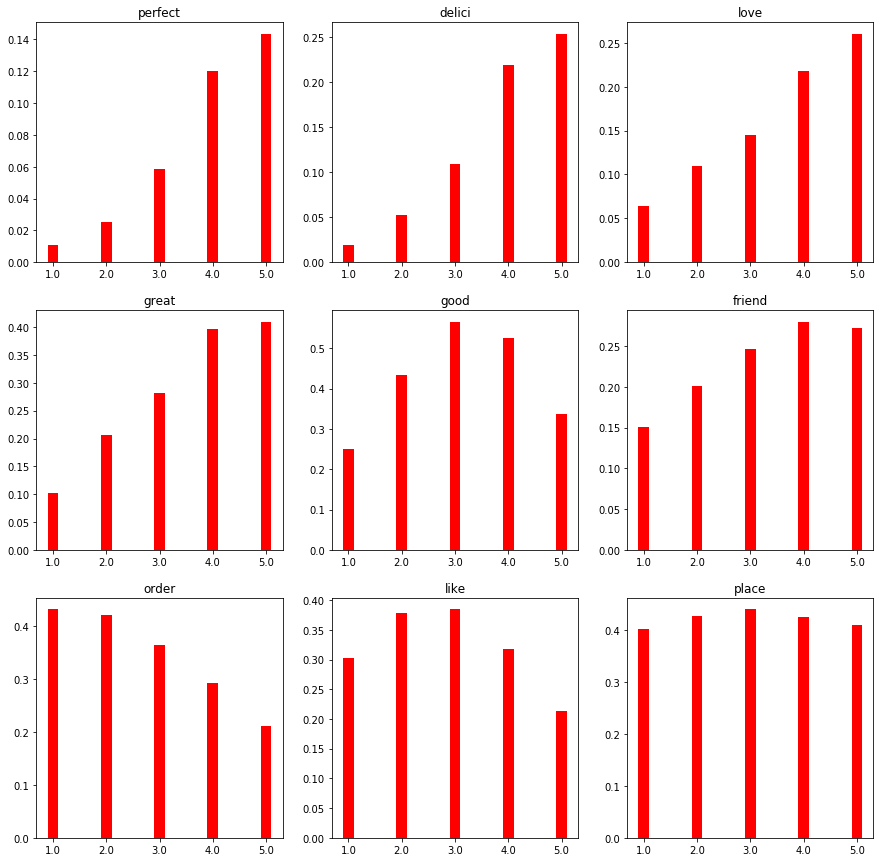

In [280]:
plt.figure(figsize=(15,15))

plt.subplot(331)
name=list(all_words.keys())
l=sorted(list(all_words[name[0]].keys()))
value=[]
for i in l:
    value.append(all_words[name[0]][i]/star_num[i])
plt.bar(l,value, color='r', width=0.2) 
plt.title(name[0])

plt.subplot(332)
name=list(all_words.keys())
l=sorted(list(all_words[name[1]].keys()))
value=[]
for i in l:
    value.append(all_words[name[1]][i]/star_num[i])
plt.bar(l,value, color='r', width=0.2) 
plt.title(name[1])

plt.subplot(333)
name=list(all_words.keys())
l=sorted(list(all_words[name[2]].keys()))
value=[]
for i in l:
    value.append(all_words[name[2]][i]/star_num[i])
plt.bar(l,value, color='r', width=0.2) 
plt.title(name[2])

plt.subplot(334)
name=list(all_words.keys())
l=sorted(list(all_words[name[3]].keys()))
value=[]
for i in l:
    value.append(all_words[name[3]][i]/star_num[i])
plt.bar(l,value, color='r', width=0.2) 
plt.title(name[3])

plt.subplot(335)
name=list(all_words.keys())
l=sorted(list(all_words[name[4]].keys()))
value=[]
for i in l:
    value.append(all_words[name[4]][i]/star_num[i])
plt.bar(l,value, color='r', width=0.2) 
plt.title(name[4])

plt.subplot(336)
name=list(all_words.keys())
l=sorted(list(all_words[name[5]].keys()))
value=[]
for i in l:
    value.append(all_words[name[5]][i]/star_num[i])
plt.bar(l,value, color='r', width=0.2) 
plt.title(name[5])


plt.subplot(337)
name=list(all_words.keys())
l=sorted(list(all_words[name[6]].keys()))
value=[]
for i in l:
    value.append(all_words[name[6]][i]/star_num[i])
plt.bar(l,value, color='r', width=0.2) 
plt.title(name[6])

plt.subplot(338)
name=list(all_words.keys())
l=sorted(list(all_words[name[7]].keys()))
value=[]
for i in l:
    value.append(all_words[name[7]][i]/star_num[i])
plt.bar(l,value, color='r', width=0.2) 
plt.title(name[7])

plt.subplot(339)
name=list(all_words.keys())
l=sorted(list(all_words[name[8]].keys()))
value=[]
for i in l:
    value.append(all_words[name[8]][i]/star_num[i])
plt.bar(l,value, color='r', width=0.2) 
plt.title(name[8])
    

#  put all words(negative) we care in a dict

In [281]:
words=['NOTdelicious', 'NOTlove', 'NOTgreat', 'NOTgood',  'NOTfriend','order','NOTlike','place','wait']

In [282]:
words_stem=[]
for word in words:
    words_stem.append(stem(word))
words_stem

['NOTdelici',
 'NOTlove',
 'NOTgreat',
 'NOTgood',
 'NOTfriend',
 'order',
 'NOTlike',
 'place',
 'wait']

In [283]:
all_words=dict()
for word in words_stem:
    all_words[word]=dict()
    for i in range(len(data)):
        if data[i]['stars'] not in all_words[word].keys():
            all_words[word][data[i]['stars']]=0
        if (word in data[i]['text']) :
            all_words[word][data[i]['stars']]+=1
    else:
        if (word in data[i]['text']):
            all_words[word][data[i]['stars']]+=1

In [284]:
all_words

{'NOTdelici': {'4.0': 438, '5.0': 674, '1.0': 28, '3.0': 135, '2.0': 53},
 'NOTlove': {'4.0': 680, '5.0': 842, '1.0': 63, '3.0': 365, '2.0': 164},
 'NOTgreat': {'4.0': 1396, '5.0': 1064, '1.0': 432, '3.0': 1745, '2.0': 1078},
 'NOTgood': {'4.0': 2319, '5.0': 1992, '1.0': 1598, '3.0': 2283, '2.0': 2142},
 'NOTfriend': {'4.0': 628, '5.0': 560, '1.0': 366, '3.0': 511, '2.0': 367},
 'order': {'4.0': 17682, '5.0': 17198, '1.0': 9785, '3.0': 10983, '2.0': 8508},
 'NOTlike': {'4.0': 3586, '5.0': 3266, '1.0': 1325, '3.0': 2384, '2.0': 1579},
 'place': {'4.0': 25594, '5.0': 33353, '1.0': 9078, '3.0': 13192, '2.0': 8613},
 'wait': {'4.0': 12469, '5.0': 14225, '1.0': 7658, '3.0': 7273, '2.0': 6265}}

In [285]:
name=list(all_words.keys())
name

['NOTdelici',
 'NOTlove',
 'NOTgreat',
 'NOTgood',
 'NOTfriend',
 'order',
 'NOTlike',
 'place',
 'wait']

Text(0.5,1,'wait')

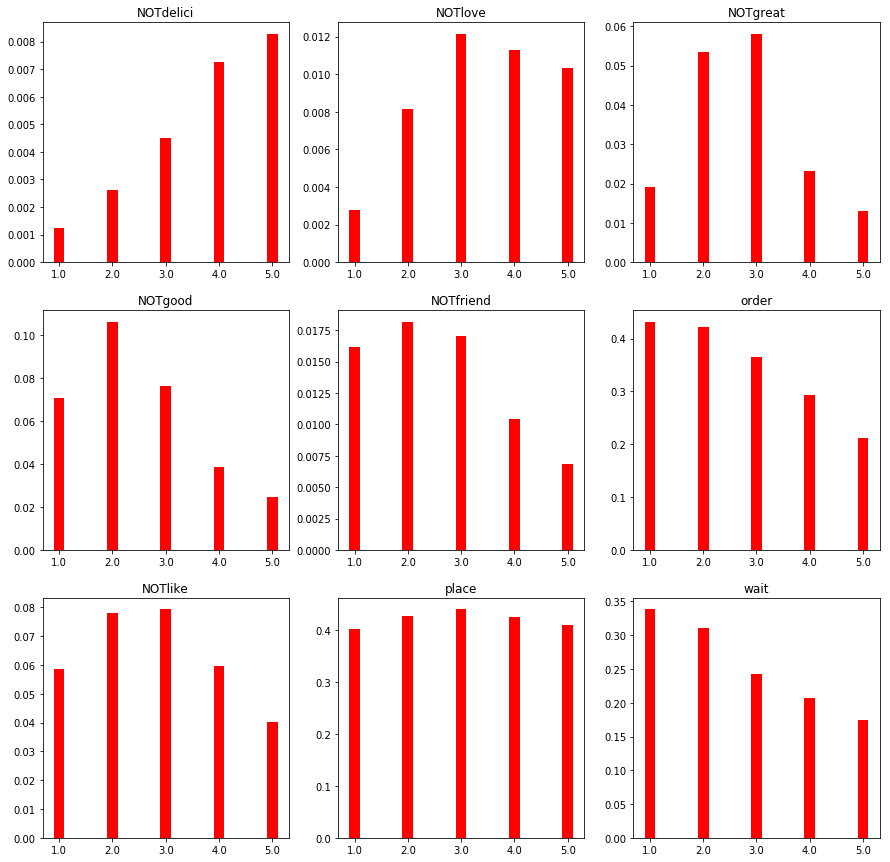

In [286]:
plt.figure(figsize=(15,15))

plt.subplot(331)
name=list(all_words.keys())
l=sorted(list(all_words[name[0]].keys()))
value=[]
for i in l:
    value.append(all_words[name[0]][i]/star_num[i])
plt.bar(l,value, color='r', width=0.2) 
plt.title(name[0])

plt.subplot(332)
name=list(all_words.keys())
l=sorted(list(all_words[name[1]].keys()))
value=[]
for i in l:
    value.append(all_words[name[1]][i]/star_num[i])
plt.bar(l,value, color='r', width=0.2) 
plt.title(name[1])

plt.subplot(333)
name=list(all_words.keys())
l=sorted(list(all_words[name[2]].keys()))
value=[]
for i in l:
    value.append(all_words[name[2]][i]/star_num[i])
plt.bar(l,value, color='r', width=0.2) 
plt.title(name[2])

plt.subplot(334)
name=list(all_words.keys())
l=sorted(list(all_words[name[3]].keys()))
value=[]
for i in l:
    value.append(all_words[name[3]][i]/star_num[i])
plt.bar(l,value, color='r', width=0.2) 
plt.title(name[3])

plt.subplot(335)
name=list(all_words.keys())
l=sorted(list(all_words[name[4]].keys()))
value=[]
for i in l:
    value.append(all_words[name[4]][i]/star_num[i])
plt.bar(l,value, color='r', width=0.2) 
plt.title(name[4])

plt.subplot(336)
name=list(all_words.keys())
l=sorted(list(all_words[name[5]].keys()))
value=[]
for i in l:
    value.append(all_words[name[5]][i]/star_num[i])
plt.bar(l,value, color='r', width=0.2) 
plt.title(name[5])


plt.subplot(337)
name=list(all_words.keys())
l=sorted(list(all_words[name[6]].keys()))
value=[]
for i in l:
    value.append(all_words[name[6]][i]/star_num[i])
plt.bar(l,value, color='r', width=0.2) 
plt.title(name[6])

plt.subplot(338)
name=list(all_words.keys())
l=sorted(list(all_words[name[7]].keys()))
value=[]
for i in l:
    value.append(all_words[name[7]][i]/star_num[i])
plt.bar(l,value, color='r', width=0.2) 
plt.title(name[7])

plt.subplot(339)
name=list(all_words.keys())
l=sorted(list(all_words[name[8]].keys()))
value=[]
for i in l:
    value.append(all_words[name[8]][i]/star_num[i])
plt.bar(l,value, color='r', width=0.2) 
plt.title(name[8])
    